## Partice Swarm Optimization 

##### Particle swarm optimization (PSO) is a metaheuristic optimization algorithm that is inspired by the social behavior of birds flocking or fish schooling. It is widely used in various fields, including optimization of map path routing.

##### Importing necessary libraries

In [4]:
import osmnx as ox
import folium
import math
import random

##### Load the map data to a variable and show the map

In [2]:
G = ox.graph_from_place("South Bengaluru, India",network_type='drive')

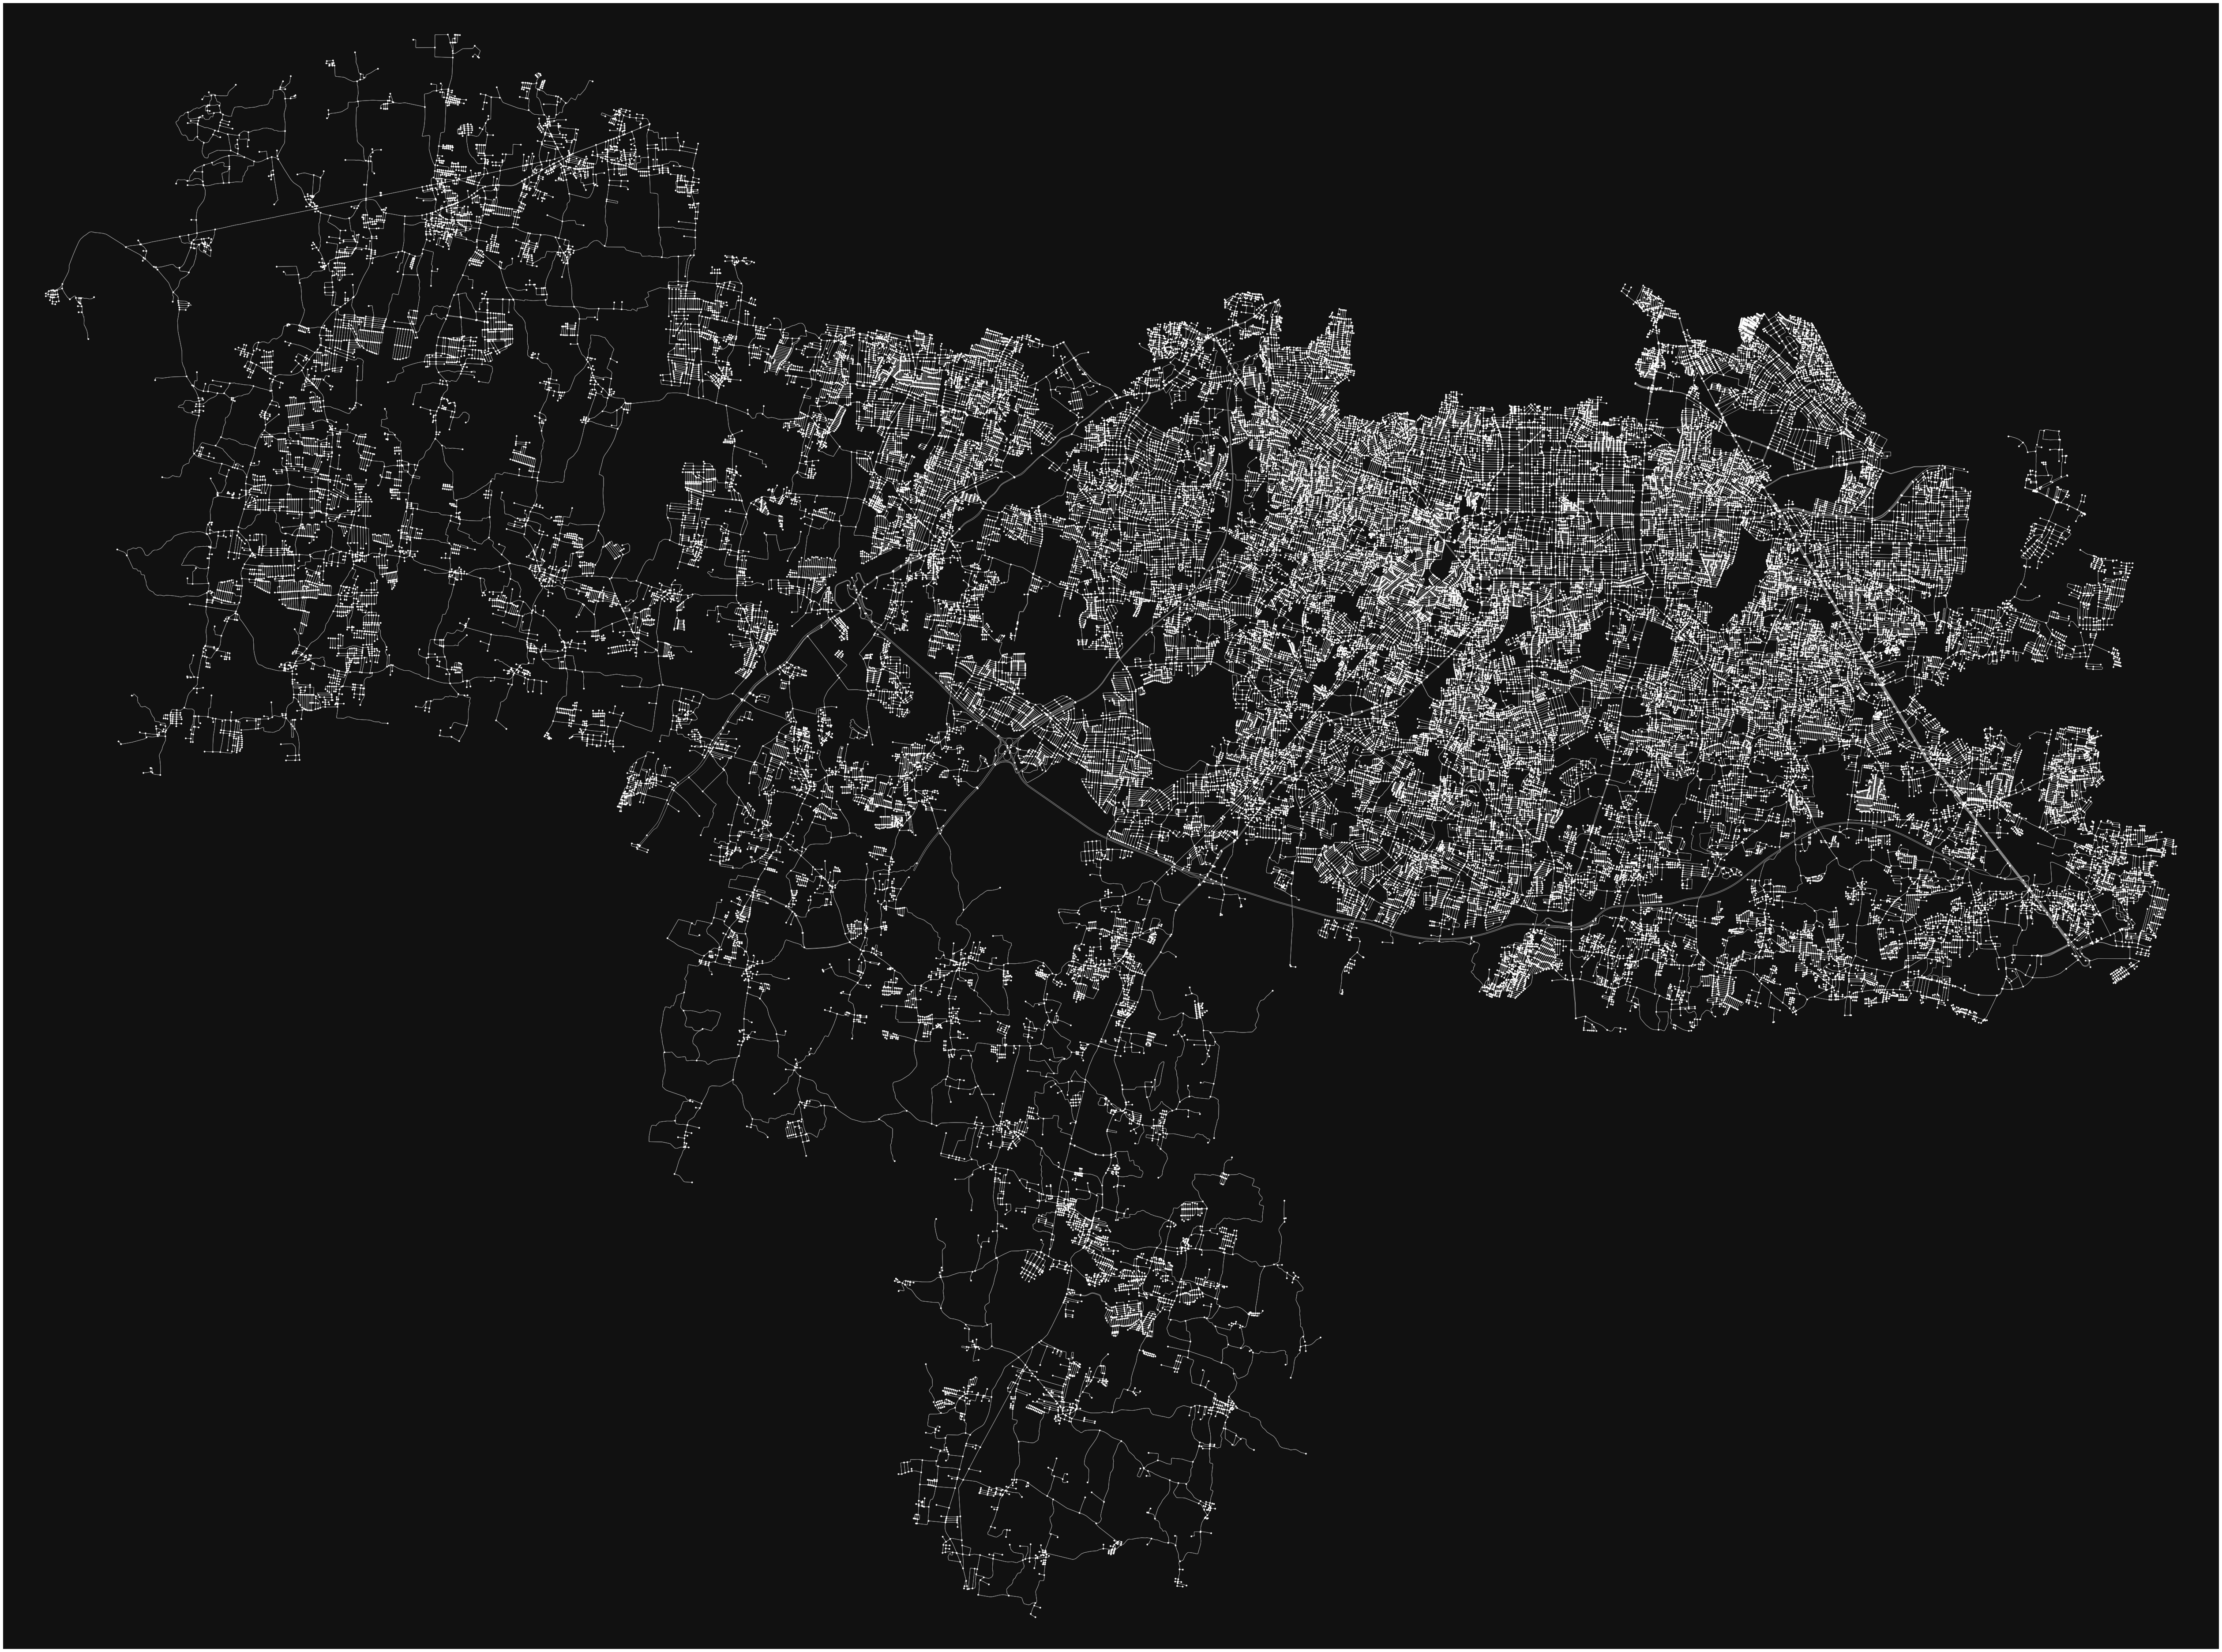

(<Figure size 6480x6480 with 1 Axes>, <AxesSubplot:>)

In [3]:
ox.plot_graph(G, figsize=(90,90))

##### Defining the haversine function to calculate distance between two points on the Earth's surface

In [5]:
def haversine(co1, co2):
    # co ordinates are in (latitiude, longitude) format
    lat1, lon1 = co1
    lat2, lon2 = co2

    #convert both to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371 # radius of Earth
    return c*r 

In [12]:
samplelatlong1 = (12.903660,77.650378)
samplelatlong2 = (12.924126,77.651681)

In [13]:
haversine(samplelatlong1,samplelatlong2)

2.28009302358352

##### From the above it is confirmed that haversine works 

##### Python code for particle swarm optimization for map path routing

In [22]:
def pso(start_coords, end_coords, population_size=20, max_iterations=50, w=0.5, c1=0.5, c2=0.5):
    # Initialize particles
    particles = []
    for i in range(population_size):
        particles.append({
            'position': list(start_coords),
            'velocity': [0, 0],
            'pbest_position': list(start_coords),
            'pbest_fitness': float('inf')
        })

    # Initialize global best
    gbest_fitness = float('inf')
    gbest_position = list(start_coords)

    # Run PSO
    for i in range(max_iterations):
        for particle in particles:
            # Update velocity
            r1 = random.random()
            r2 = random.random()
            particle['velocity'][0] = w * particle['velocity'][0] + c1 * r1 * (particle['pbest_position'][0] - particle['position'][0]) + c2 * r2 * (gbest_position[0] - particle['position'][0])
            particle['velocity'][1] = w * particle['velocity'][1] + c1 * r1 * (particle['pbest_position'][1] - particle['position'][1]) + c2 * r2 * (gbest_position[1] - particle['position'][1])

            # Update position
            particle['position'][0] += particle['velocity'][0]
            particle['position'][1] += particle['velocity'][1]

            # Evaluate fitness
            fitness = haversine(particle['position'], list(end_coords))

            # Update personal best
            if fitness < particle['pbest_fitness']:
                particle['pbest_fitness'] = fitness
                particle['pbest_position'] = particle['position']

            # Update global best
            if fitness < gbest_fitness:
                gbest_fitness = fitness
                gbest_position = particle['position']

    # Return the best path
    return gbest_position

##### Visualization of the working

In [14]:
source = (12.903660,77.650378)
destination = (12.924473, 77.558269)

In [23]:
pso_path = pso(source, destination)

##### Folium Map

In [24]:
m = folium.Map(location=source, zoom_start=13)

In [25]:
folium.Marker(source, icon=folium.Icon(color='red')).add_to(m)
folium.Marker(destination, icon=folium.Icon(color='green')).add_to(m)

In [26]:
folium.PolyLine([source, pso_path, destination], color='blue', weight=5).add_to(m)

In [27]:
m